In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 77s 0us/step

In [2]:
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0].shape

(32, 32, 3)

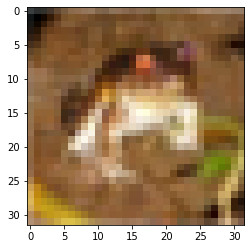

In [7]:
plt.imshow(x_train[0]);

In [8]:
x_train[0].max()

255

In [9]:
x_train = x_train/255
x_test = x_test/255

x_test.shape

(10000, 32, 32, 3)

In [10]:
from tensorflow.keras.utils import to_categorical

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [15]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 4s 2ms/step - loss: 1.4884 - accuracy: 0.4644 - val_loss: 1.2596 - val_accuracy: 0.5531

In [16]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.488408,0.46436,1.259632,0.5531
1,1.151234,0.59306,1.152153,0.5914
2,1.006469,0.64790,1.022926,0.6414
3,0.904303,0.68400,0.991998,0.6532
4,0.819224,0.71396,0.939692,0.6769
5,0.748488,0.73938,0.930968,0.6808
6,0.676783,0.76482,0.999711,0.6702
7,0.612177,0.78470,0.990372,0.6872


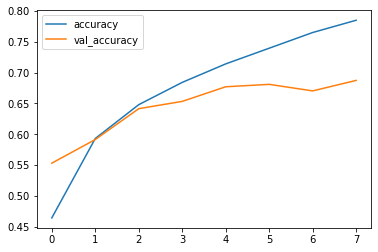

In [17]:
metrics[['accuracy', 'val_accuracy']].plot();

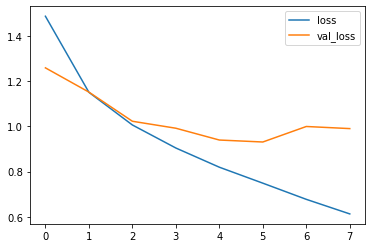

In [18]:
metrics[['loss', 'val_loss']].plot();

In [19]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.9903720021247864, 0.6872000098228455]

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict_classes(x_test)
print(classification_report(y_test, predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.82      0.78      0.80      1000
           2       0.52      0.65      0.58      1000
           3       0.53      0.42      0.47      1000
           4       0.63      0.63      0.63      1000
           5       0.60      0.58      0.59      1000
           6       0.73      0.79      0.76      1000
           7       0.79      0.70      0.74      1000
           8       0.77      0.82      0.79      1000
           9       0.74      0.80      0.77      1000

    accuracy                           0.69     10000
   macro avg    

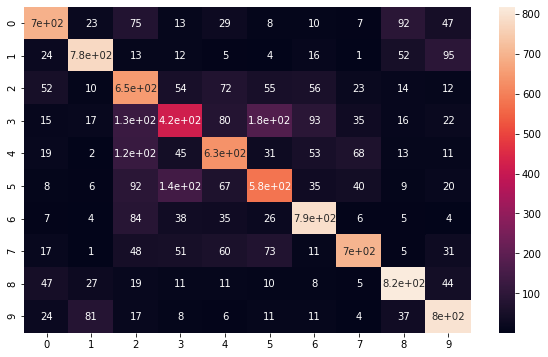

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [24]:
my_image = x_test[0]
my_image

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

In [25]:
y_test[0]

array([3], dtype=uint8)

In [26]:
model.predict_classes(my_image.reshape(1, 32, 32, 3))

array([3], dtype=int64)